In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GDAnalysisAC import LinDiscAnalysis, QuadDiscAnalysis
from GDAnalysisAC import utilsAC

## Linear Discriminant Analysis

In [2]:
def lda_pipeline(X, y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(X, y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

    lda_ac = LinDiscAnalysis()
    lda_ac.fit(train_x, train_y)
    pred = lda_ac.predict(test_x)
    pf = utilsAC.get_performance_measure(test_y, pred)
    print(f'Performance Measures: {pf}\n')
    print(f'Trained weights: {lda_ac.get_params()}\n')
    utilsAC.plot_dec_bound(X, y, lda_ac.get_params())
    if len(np.unique(y)) == 2:
        pred_prob = lda_ac.predict(test_x, prob=True)
        thresh = np.arange(-1, 1, 0.001)
        utilsAC.plot_roc(test_y, pred_prob, thresh=thresh)

### Data 1 (Binary LDA)

In [3]:
data1 = pd.read_csv('data/data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


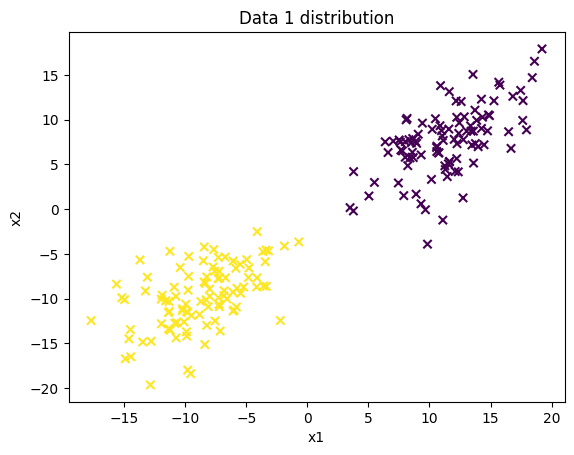

In [4]:
plt.scatter(data1[0], data1[1], marker='x', c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [5]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

Performance Measures: {'tp': 28, 'tn': 32, 'fp': 0, 'fn': 0, 'precision': 1.0, 'recall': 1.0, 'spec': 1.0, 'f1': 1.0}

Trained weights: [ 3.57508938 -4.65040066 -2.29653746]



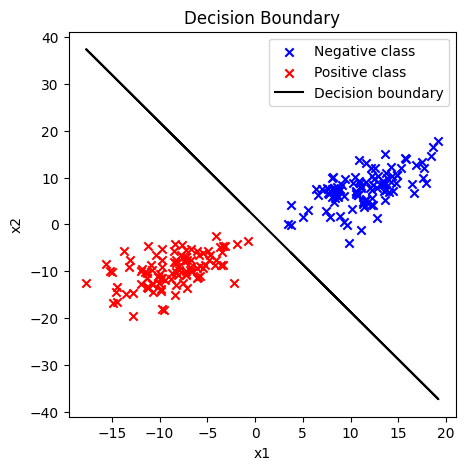

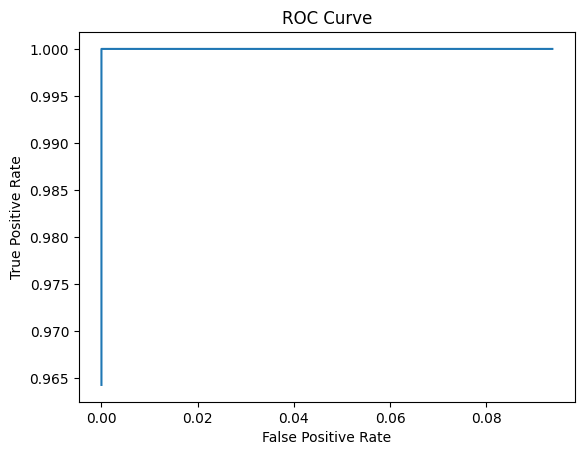

In [6]:
lda_pipeline(data1_x, data1_y)

### Data 2 - Heart Disease Dataset (Binary LDA)

In [7]:
data2 = pd.read_csv('data/heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data2_x = data2.iloc[:, :-1]
data2_y = data2.iloc[:, -1]

data2_y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

Performance Measures: {'tp': 147, 'tn': 109, 'fp': 39, 'fn': 13, 'precision': 0.7903225806451613, 'recall': 0.91875, 'spec': 0.7364864864864865, 'f1': 0.8497109826589595}

Trained weights: [ 1.27315873 -0.30285095 -0.82154556  1.21849337 -0.71597559 -1.23466527
  0.09245572  0.51072286  1.88300176 -0.54564414 -1.66626665  0.39849499
 -1.44022749 -1.37953451]

Facility to plot decision boundary for data with more than 3 features has not been added yet!


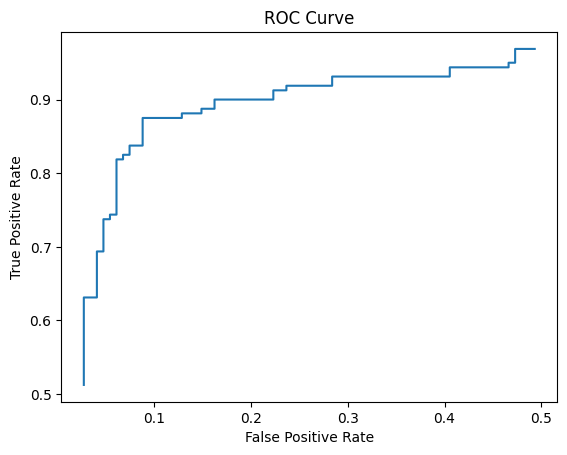

In [9]:
lda_pipeline(data2_x, data2_y)

### Data 3 (Multiclass LDA)

In [10]:
data3 = pd.read_csv('data/data3.csv', header=None)
print(data3.iloc[:, -1].value_counts())
data3.head()

3
1    100
2    100
3    100
Name: count, dtype: int64


,0,1,2,3
0,-6.2213,2.8432,10.5470,1
1,-14.9730,-6.4275,3.8337,1
2,-5.9850,-3.9402,11.9860,1
3,-6.8994,1.8714,11.2250,1
4,-4.8246,4.9447,17.2610,1


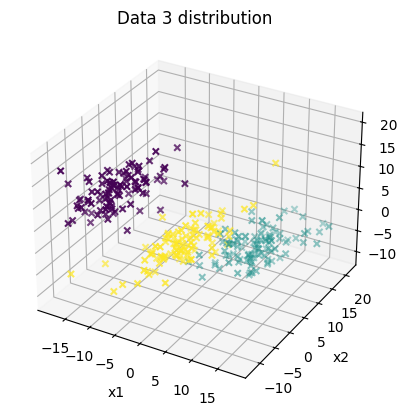

In [11]:
ax = plt.axes(projection='3d')
ax.scatter3D(data3.iloc[:, 0], data3.iloc[:, 1], data3.iloc[:, 2], c=data3.iloc[:, 3], marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data 3 distribution')
plt.show()

In [12]:
data3_x = data3.iloc[:, :-1]
data3_y = data3.iloc[:, -1]

Performance Measures: {'acc': 0.9555555555555556}

Trained weights: {3: array([-13.44025425,  33.21899799,  -3.79844694,  24.70853719]), 2: array([-15.70289014,  27.45754442,   7.3968389 ,  24.95880813]), 1: array([-14.96385585,  23.82454119,   5.08136026,  29.63351662])}



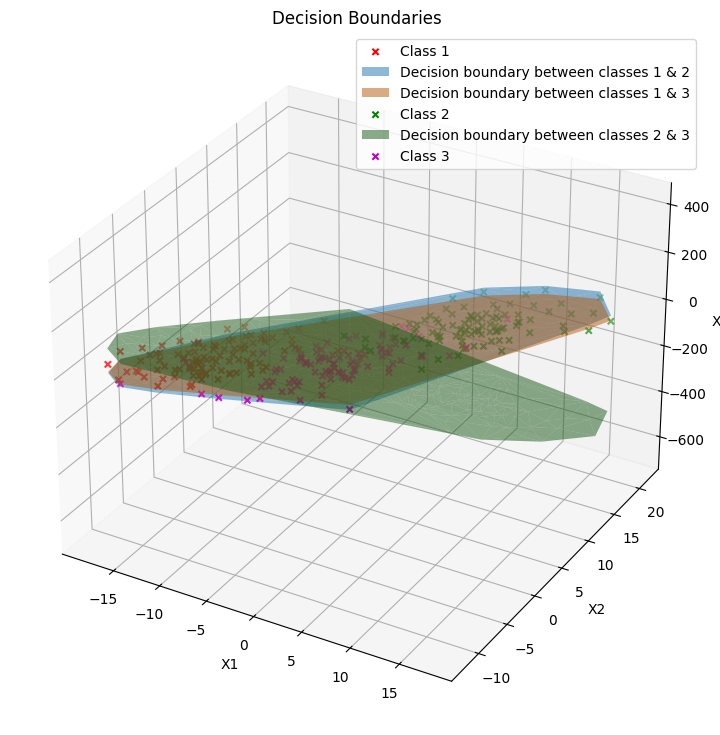

In [13]:
lda_pipeline(data3_x, data3_y)

## Quadratic Discriminant Analysis

In [14]:
def qda_pipeline(X, y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(X, y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)
    qda_ac = QuadDiscAnalysis()
    qda_ac.fit(train_x, train_y)
    pred = qda_ac.predict(test_x)
    pf = utilsAC.get_performance_measure(test_y, pred)
    print(f'Performance Measures: {pf}\n')

### Data 4 (Binary QDA)

In [15]:
data4 = pd.read_csv('data/data4.csv', header=None)
print(data4.shape)
data4.head()

(200, 3)


,0,1,2
0,14,42,1
1,29,40,1
2,22,22,1
3,11,20,1
4,10,35,1


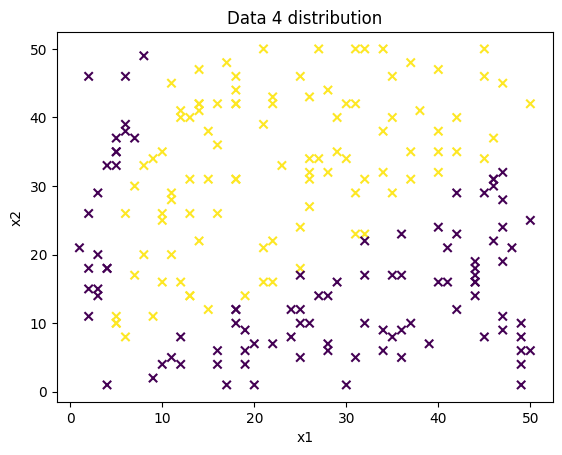

In [16]:
plt.scatter(data4[0], data4[1], marker='x', c=data4[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 4 distribution')
plt.show()

In [17]:
data4_x = data4.iloc[:, :-1]
data4_y = data4.iloc[:, -1]
data4_y.value_counts()

2
 1    100
-1    100
Name: count, dtype: int64

In [18]:
qda_pipeline(data4_x, data4_y)

Performance Measures: {'tp': 26, 'tn': 23, 'fp': 4, 'fn': 7, 'precision': 0.8666666666666667, 'recall': 0.7878787878787878, 'spec': 0.8518518518518519, 'f1': 0.8253968253968254}



### Data 5 (Multiclass QDA)

In [19]:
data5 = pd.read_csv('data/data5.csv', header=None)
print(data5.shape)
data5.head()

(300, 4)


,0,1,2,3
0,-9.8032,-7.75440,1.47200,1
1,-3.0264,-4.52130,2.19240,1
2,-1.4833,-6.62440,3.13420,1
3,-4.9690,-0.78348,-3.51890,1
4,-6.1224,-5.09510,0.99638,1


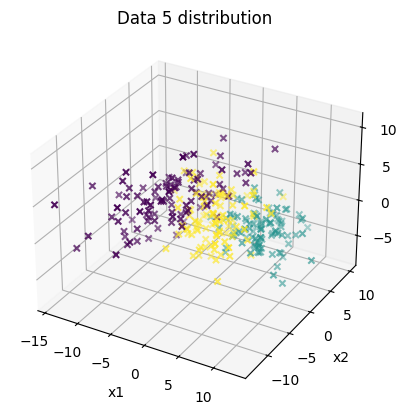

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(data5.iloc[:, 0], data5.iloc[:, 1], data5.iloc[:, 2], c=data5.iloc[:, 3], marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data 5 distribution')
plt.show()

In [21]:
data5_x = data5.iloc[:, :-1]
data5_y = data5.iloc[:, -1]
data5_y.value_counts()

3
1    100
2    100
3    100
Name: count, dtype: int64

In [22]:
qda_pipeline(data5_x, data5_y)

Performance Measures: {'acc': 0.8444444444444444}

